# Bitcoin: Precio e interés de la gente a lo largo de la historia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Registro diario del pecio de BTC

Datos extraídos de [Coin Metrics](https://coinmetrics.io/community-network-data/)

In [ ]:
df = pd.read_csv("btc.csv")
df = df.loc[:,['time','PriceUSD']]
df.dropna(inplace=True)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df.head(5)

,time,PriceUSD
561,2010-07-18,0.085840
562,2010-07-19,0.080800
563,2010-07-20,0.074736
564,2010-07-21,0.079193
565,2010-07-22,0.058470


# Registro mensual de interés en Bitcoin

Datos extraídos de [Google Trends](https://trends.google.es/trends/explore?date=all&q=Bitcoin)

### ¿Cómo se normalizan los datos de Google Trends?
Google Trends normaliza los datos de búsqueda para facilitar las comparaciones entre los términos. Los resultados de búsqueda se normalizan según la hora y la ubicación de las consultas mediante el siguiente proceso:

* Cada punto de datos se divide por el total de búsquedas de la región geográfica y el intervalo de tiempo que representa para comparar su popularidad relativa. De lo contrario, los lugares con mayor volumen de búsquedas siempre aparecerían en los primeros puestos.

* A continuación, los números resultantes se escalan a un intervalo del 0 al 100 en función de la proporción de un tema con respecto al total de búsquedas sobre todos los temas.

* Las regiones que registran el mismo interés de búsqueda de un término no siempre tienen los mismos volúmenes de búsquedas totales.

Podes leer más información haciendo [Click acá](https://support.google.com/trends/answer/4365533?hl=es).

In [3]:
df_trends = pd.read_csv("multiTimeline.csv")

#Convierto la fecha a DateTime y filtro a partir de la fecha que me interesa
df_trends.Time= pd.to_datetime(df_trends.Time, errors='coerce')
df_trends=df_trends.loc[df_trends.Time >= pd.to_datetime('2010-07-01')]

#Para el Interest Rate reemplazo los <1 por 0, y cambio el tipo de dato a int 
df_trends.BitcoinInterestRate.replace({'<1':'0'}, inplace=True)
df_trends.BitcoinInterestRate = df_trends.BitcoinInterestRate.astype(int)

df_trends.head()

,Time,BitcoinInterestRate
78,2010-07-01,0
79,2010-08-01,0
80,2010-09-01,0
81,2010-10-01,0
82,2010-11-01,0


In [4]:
# Llevo el InterestRate a la misma escala en que está el precio del BTC para poder comparar en el gráfico
df_trends_escalado = df_trends.copy()
df_trends_escalado.BitcoinInterestRate = df_trends.BitcoinInterestRate * (df.PriceUSD.max()/100)

## Gráficos estáticos

### Gráfico histórico

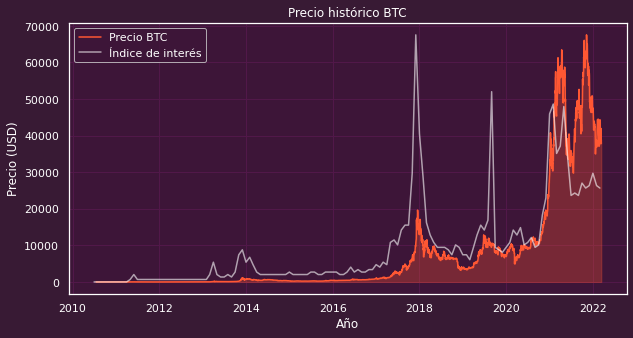

In [5]:
sns.set(rc={'axes.facecolor':'3D1538', 'figure.facecolor':'381A34', 'grid.color':'#511849', 
            'text.color':'white',"xtick.color":'white', "ytick.color":'white', "axes.labelcolor":'white'})

plt.figure(figsize=[10,5])
sns.lineplot(data=df, x='time', y='PriceUSD', color='#ff5733', label= 'Precio BTC')
plt.fill_between(df['time'], df['PriceUSD'], color = '#ff5733', alpha=0.3)
sns.lineplot(data=df_trends_escalado, x='Time', y='BitcoinInterestRate', color='white',alpha =0.6 , label='Índice de interés')
plt.title("Precio histórico BTC")
plt.ylabel("Precio (USD)")
plt.xlabel("Año")
plt.legend()
plt.show()

### Gráfico de los últimos 5 años

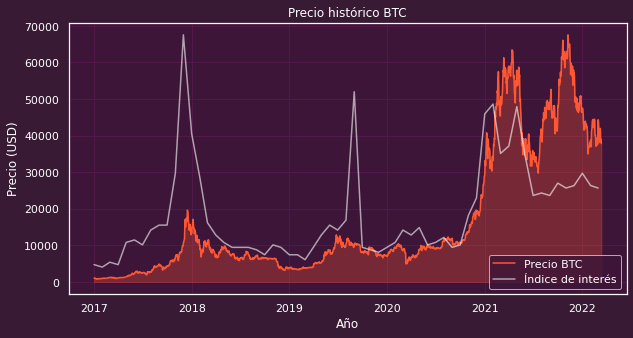

In [6]:
df2 = df[df.time.apply(lambda x: x.year > 2016)]
df_trends2 = df_trends_escalado[df_trends.Time.apply(lambda x: x.year > 2016)]

sns.set(rc={'axes.facecolor':'3D1538', 'figure.facecolor':'381A34', 'grid.color':'#511849', 
            'text.color':'white',"xtick.color":'white', "ytick.color":'white', "axes.labelcolor":'white'})

plt.figure(figsize=[10,5])
sns.lineplot(data=df2, x='time', y='PriceUSD', color='#ff5733', label= 'Precio BTC')
plt.fill_between(df2['time'], df2['PriceUSD'], color = '#ff5733', alpha=0.3)
sns.lineplot(data=df_trends2, x='Time', y='BitcoinInterestRate', color='white',alpha =0.6 , label='Índice de interés')
plt.title("Precio histórico BTC")
plt.ylabel("Precio (USD)")
plt.xlabel("Año")
plt.legend()
plt.show()

## Probando gráficos interactivos

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

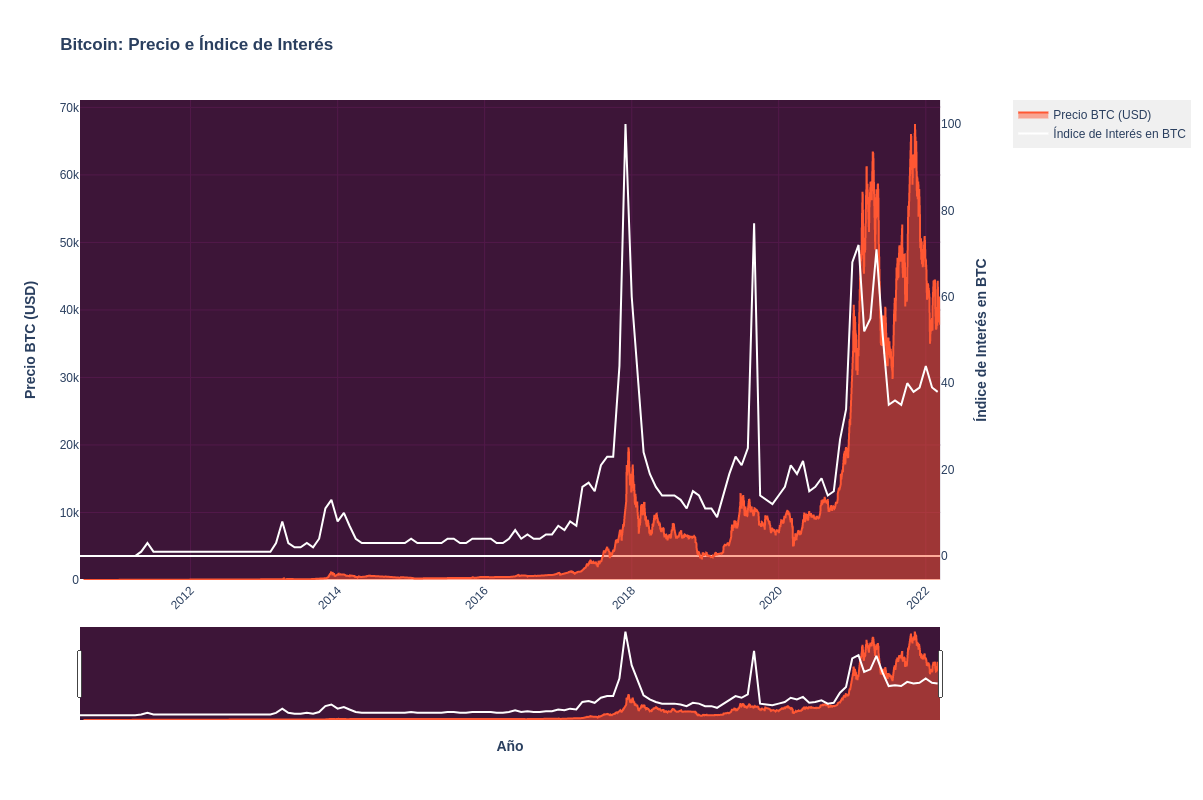

In [33]:
trace1 = go.Scatter(x=df.time, y=df.PriceUSD, fill='tozeroy', name='Precio BTC (USD)', line_color="#ff5733")
trace2 = go.Scatter(x=df_trends.Time, y=df_trends.BitcoinInterestRate, name='Índice de Interés en BTC', line_color ="white")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1200, title = '<b>Bitcoin: Precio e Índice de Interés<b>',xaxis=dict(tickangle=-45),
                     plot_bgcolor="#3D1538", paper_bgcolor='white', legend = dict(bgcolor = '#F0F0F0'))

fig.update_yaxes(title_text="<b>Precio BTC (USD)</b>", secondary_y=False,gridcolor="#511849")
fig.update_yaxes(title_text="<b>Índice de Interés en BTC</b>", secondary_y=True, showgrid=False)
fig.update_xaxes(title_text="<b>Año<b>", rangeslider_visible=True, gridcolor="#511849")
iplot(fig)
fig.write_html("grafico.html")

## Observaciones

El comportamiento es bastante intuitivo. Se puede observar que cada vez que hay una subida importante en el precio del BTC, viene acompañado por pico del interés por parte de las personas. A si mismo, cada vez que hay una fuerte caida en el precio, también se puede observar una notable pérdida de interés.

El pico de interés más fuerte en Bitcoin podemos ver que ocurre en diciembre del 2017, cuando BTC alcanza casi los 20k. Sin embargo, desde aquel momento hasta la actualidad, la popularidad de Bitcoin (y de todos los ecosistemas cripto en general) ha crecido fuertemente en los últimos años. A pesar de esto, vemos que ningún pico del interés supera al de fines del 2017, esto se debe a que los datos no representan las búsquedas en valor absoluto.

Por otro lado, un dato interesante es que en noviembre del 2021, a pesar de haber alcanzado el ATH, no se presenta un pico notable en el interés por parte de las personas, a diferencia de las otras subidas.